
Estatísticas Descritivas Gerais:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


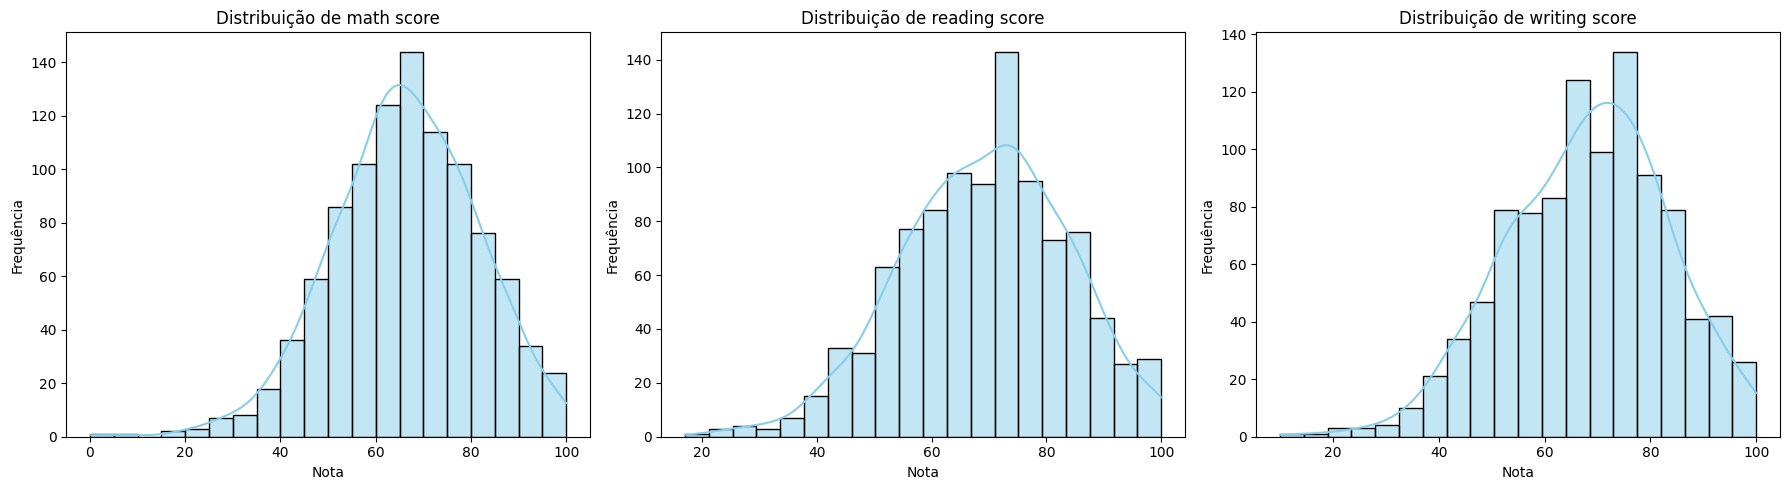

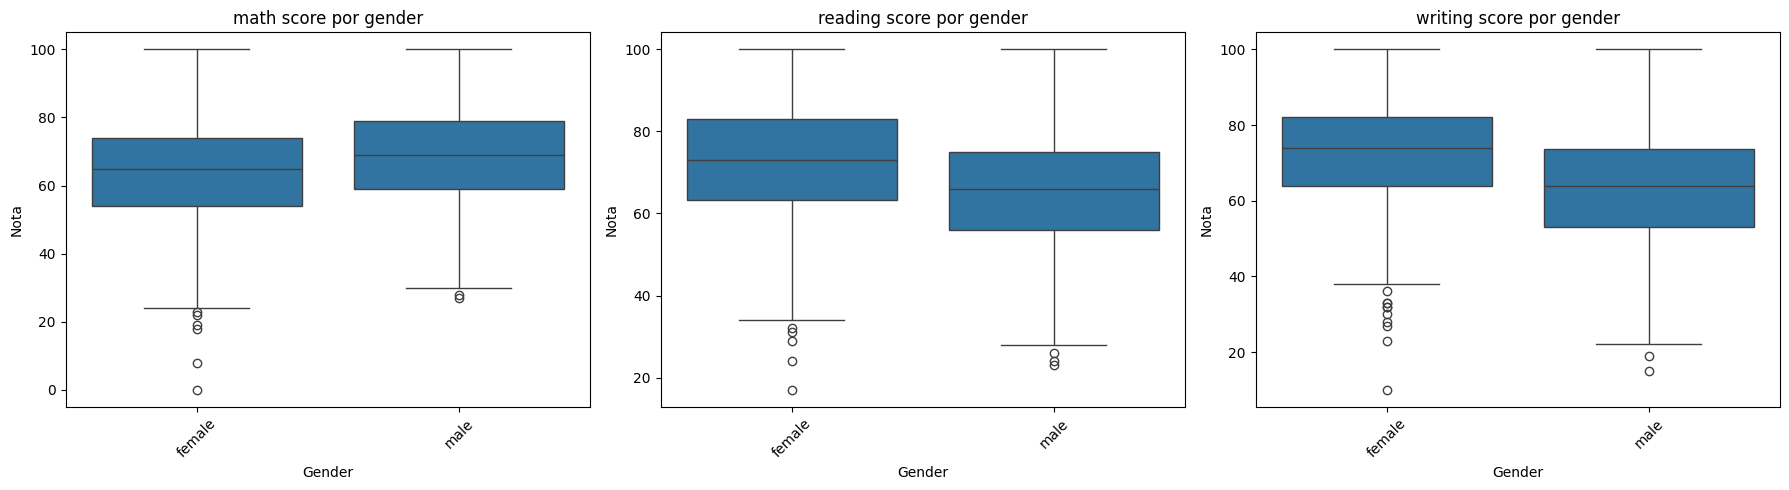

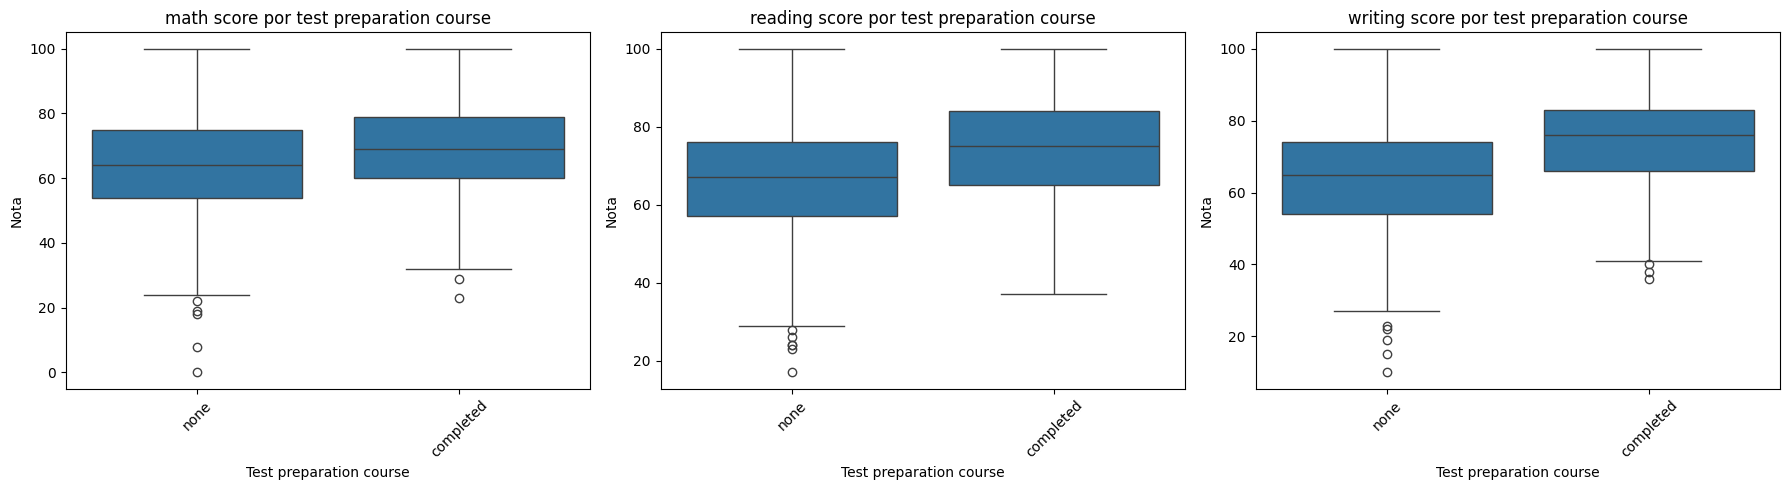

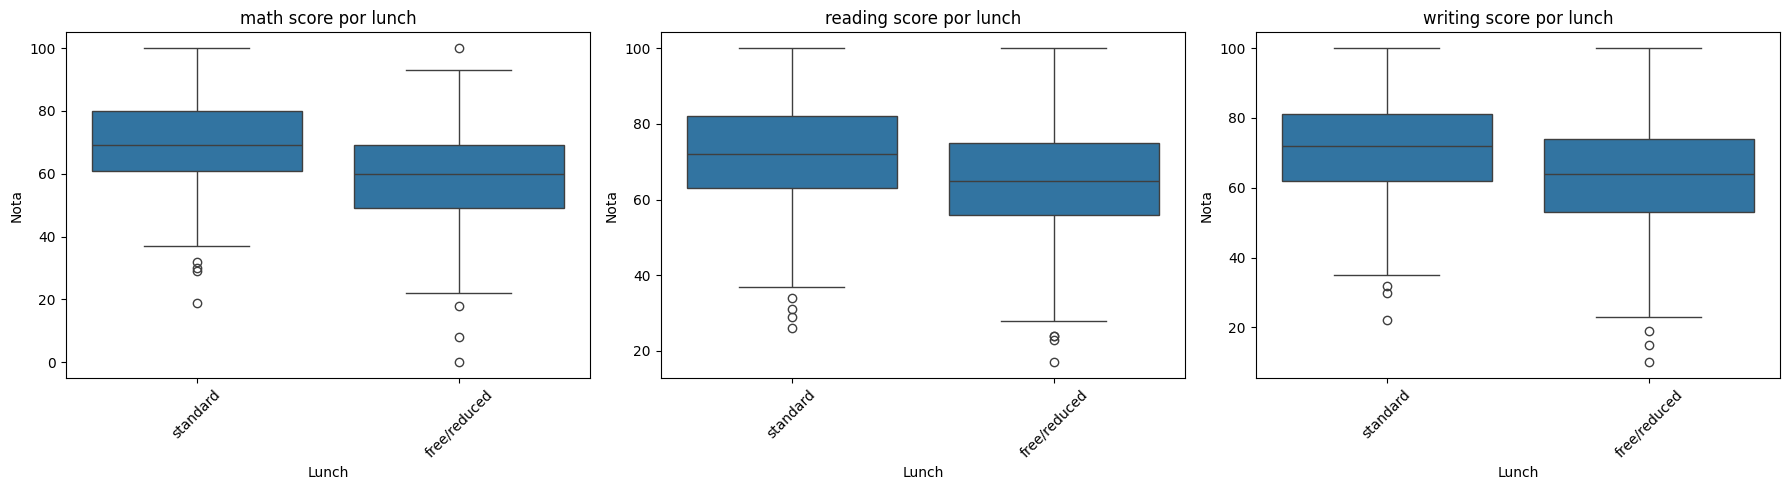

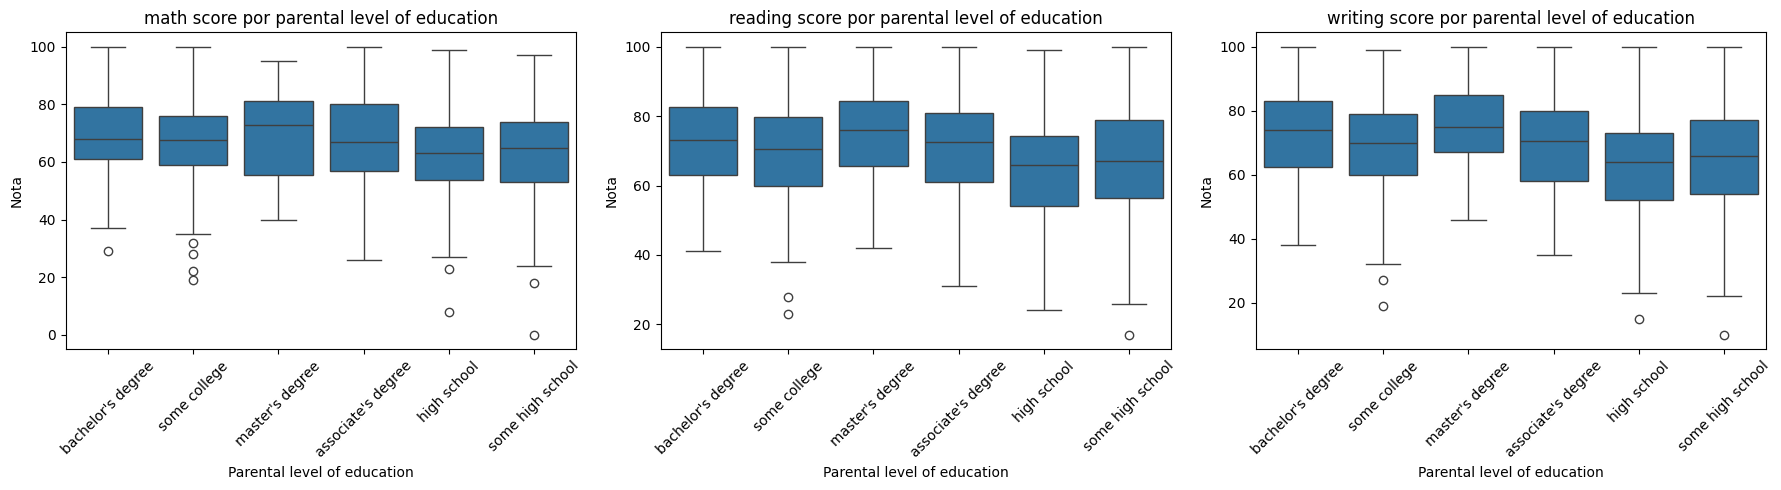

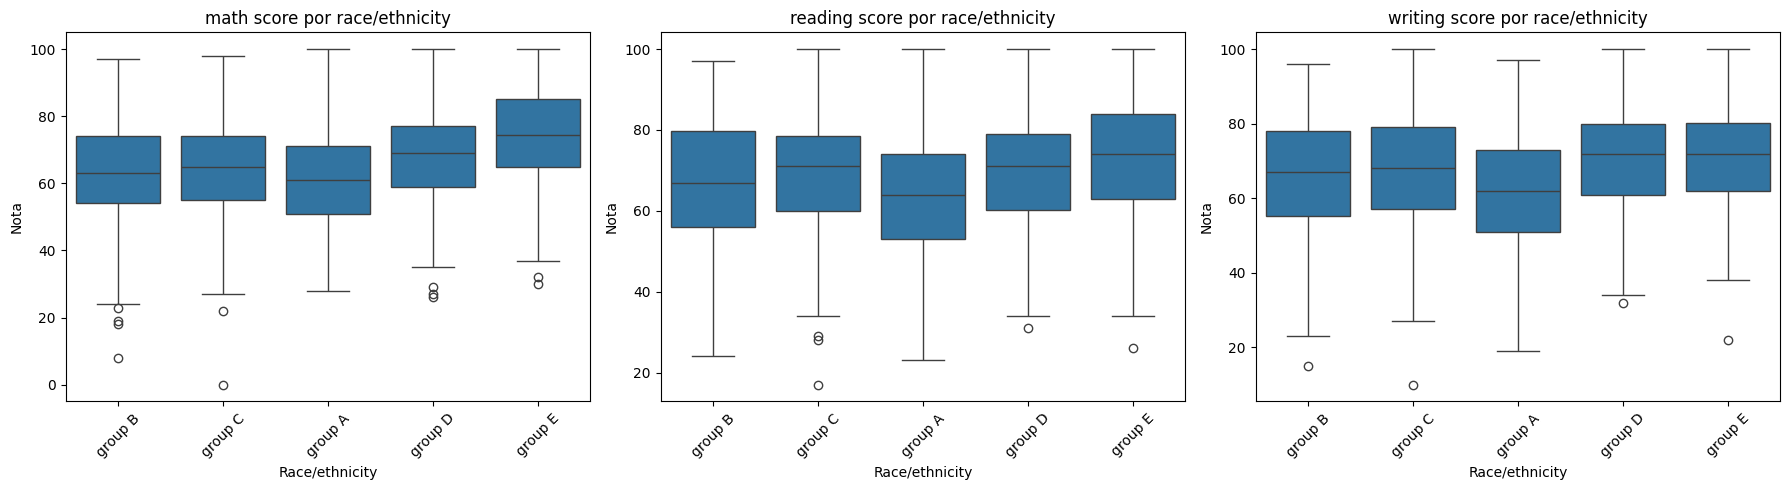


Médias das Notas por Gênero:
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

Médias das Notas por Curso Preparatório:
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


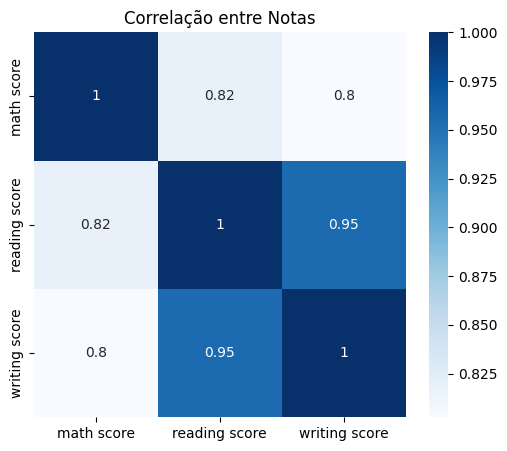

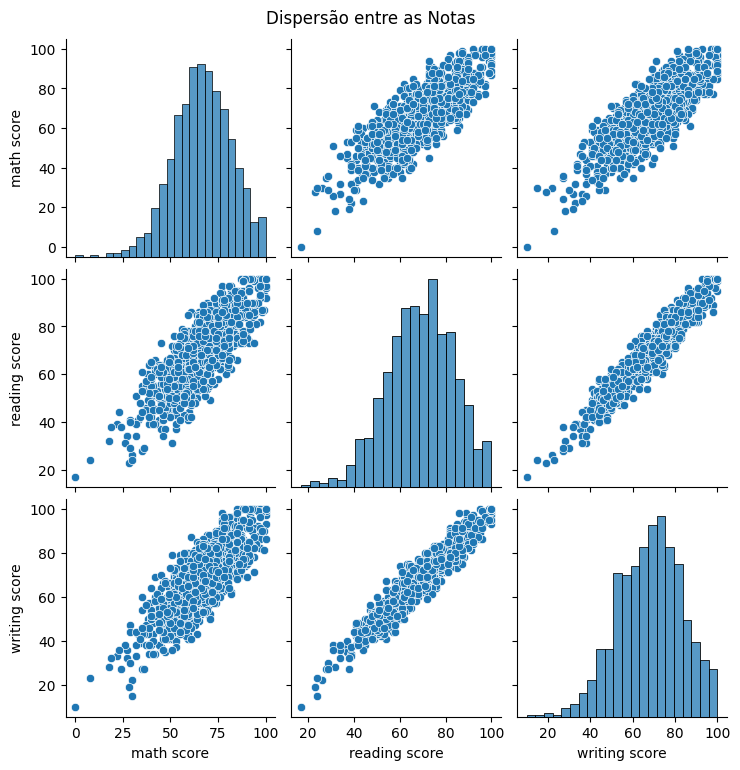

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 1. CARREGAMENTO DOS DADOS
# ============================
df = pd.read_csv("StudentsPerformance.csv")

# ============================
# 2. ESTATÍSTICAS DESCRITIVAS
# ============================
print("\nEstatísticas Descritivas Gerais:")
print(df[['math score', 'reading score', 'writing score']].describe())

# ============================
# 3. HISTOGRAMAS DAS NOTAS
# ============================
plt.figure(figsize=(18, 5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[subject], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {subject}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# ============================
# 4. BOXPLOTS POR GRUPO
# ============================

def plot_boxplots_by_category(category):
    plt.figure(figsize=(18, 5))
    for i, subject in enumerate(['math score', 'reading score', 'writing score']):
        plt.subplot(1, 3, i+1)
        sns.boxplot(data=df, x=category, y=subject)
        plt.title(f'{subject} por {category}')
        plt.xlabel(category.capitalize())
        plt.ylabel('Nota')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Comparações
plot_boxplots_by_category('gender')
plot_boxplots_by_category('test preparation course')
plot_boxplots_by_category('lunch')
plot_boxplots_by_category('parental level of education')
plot_boxplots_by_category('race/ethnicity')

# ============================
# 5. MÉDIAS AGRUPADAS
# ============================

agrupadas = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print("\nMédias das Notas por Gênero:")
print(agrupadas)

agrupadas2 = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print("\nMédias das Notas por Curso Preparatório:")
print(agrupadas2)

# ============================
# 6. CORRELAÇÃO ENTRE NOTAS
# ============================
plt.figure(figsize=(6, 5))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Blues')
plt.title('Correlação entre Notas')
plt.show()

# ============================
# 7. RELAÇÃO ENTRE AS NOTAS
# ============================
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Dispersão entre as Notas', y=1.02)
plt.show()
